# Evolution of Einstein's equations

In [1]:
testx=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
testy=testx.^2

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [2]:
testdder=zeros(10)

aux=zeros(10)
testddertwo=zeros(10)
i=1
for i in 2:9
    
    aux[i]=(testy[i+1]-testy[i-1])/(2*(2-1))

end
i=1
aux[1]=(testy[i+3]-4*testy[i+2]+7*testy[i+1]-4*testy[i])/(2*(2-1))
i=10
aux[10]=(-testy[i-3]+4*testy[i-2]-7*testy[i-1]+4*testy[i])/(2*(2-1))

for i in 3:8
    testdder[i]=(-testy[i+2]+16*testy[i+1]-30*testy[i]+16*testy[i-1]-testy[i-2])/(12*(2-1))
    testddertwo[i]=(-aux[i+2]+8*aux[i+1]-8*aux[i-1]+aux[i-2])/(12*(2-1))
    i=i+1
end
i=1
testdder[1]=(15/4*testy[i]-77/6*testy[i+1]+107/6*testy[i+2]-13*testy[i+3]+61/12*testy[i+4]-5/6*testy[i+5])/((2-1))
i=2
testdder[2]=(-testy[i+5]+7*testy[i+4]-21*testy[i+3]+34*testy[i+2]-19*testy[i+1]-9*testy[i]+9*testy[i-1])/(12*(2-1))
i=9
testdder[9]=(-testy[i-5]+7*testy[i-4]-21*testy[i-3]+34*testy[i-2]-19*testy[i-1]-9*testy[i]+9*testy[i+1])/(12*(2-1))
i=10
testdder[10]=(15/4*testy[i]-77/6*testy[i-1]+107/6*testy[i-2]-13*testy[i-3]+61/12*testy[i-4]-5/6*testy[i-5])/((2-1))




1.9999999999999218

In [3]:
testdder

10-element Vector{Float64}:
 1.9999999999999858
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 1.9999999999999218

# Initial data , setting length of the domain and discretization


# Parameters

In [33]:
m=1
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [34]:
global compactified=false
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [35]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [93]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [94]:
print(N)

200.0

In [95]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [127]:
using Printf
include("./TMYangMills.jl");

In [128]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.01
the time step is 0.0001


# Initial data of m β Ψ and Ψ,x

In [129]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initpi=zeros(L)
initderxchi=zeros(L)
initderpsi=zeros(L)
initxchi=zeros(L)

#state array is m beta psi xchi,u xchi,rORx psi,r xchi r
state_array=[initm initbeta initpsi initpi initderxchi initderpsi initxchi initX];
#attention:  in noncompactified code derxchi is (xchi),r. in compactified code derxchi is (xchi),x


#PSI,R
A=0.075*p*(1−q)
r0=0.2
sigma=0.1

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#XCHI
A=0.01
r0=0.3
sigma=0.07

initxchi[4:L-3] = init_xchi(initX1,r0,sigma,A)

state_array[:,7] = initxchi

####
#PSI FROM PSI,R, CHI,R FROM CHI
state_array[4:L-3,5]=Der_arrayLOP(state_array,7,initX)[4:L-3]#derivative(xchi_func, initX1; nu=1)#Der_array(state_array,7,initX)[4:L-3]


aux=Der_arrayLOP(state_array,5,initX)


# update interpolation of psi,x
derxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,5],  k=4);
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);
xchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);
derrxchi_func = Spline1D(initX[4:L-3], aux[4:L-3], k=4);

funcs=[derxchi_func derpsi_func xchi_func derrxchi_func];

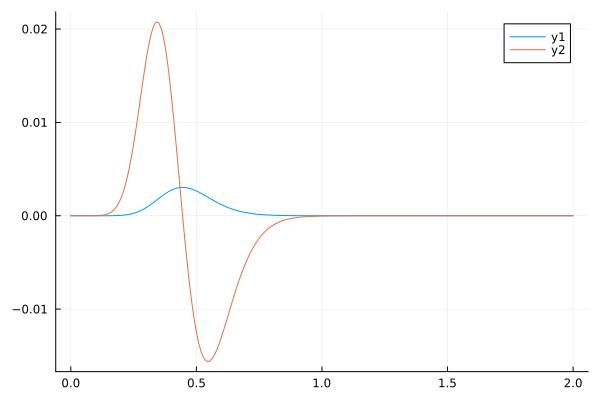

In [130]:
using Plots
plot(initX1, [state_array[4:L-3,7] state_array[4:L-3,5]])

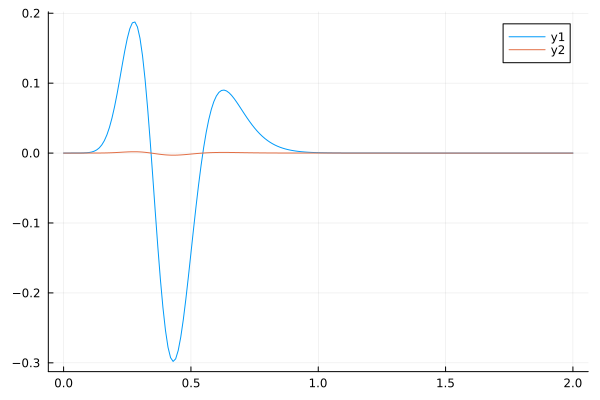

In [131]:
plot(initX[4:L-3], [Der_arrayLOP(state_array,5,initX)[4:L-3] DDer_array(state_array,7,initX)[4:L-3]])

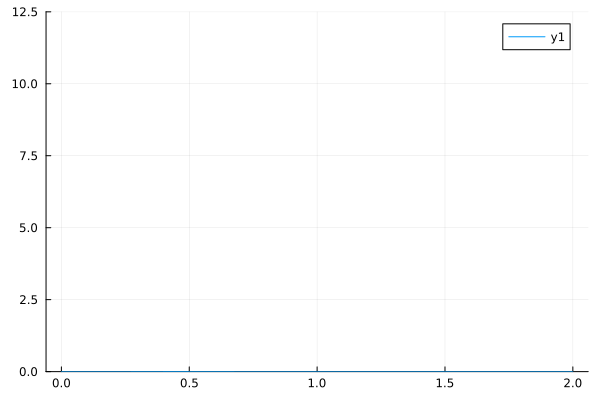

In [132]:
plot(initX1, state_array[4:L-3,7],ylim=[0,12.5])

In [133]:
y0=[0.0 0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:4] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:4] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

201×4 Matrix{Float64}:
 0.0  0.0  0.0   0.0
 0.0  0.0  0.0   2.12913e-10
 0.0  0.0  0.0   2.37284e-9
 0.0  0.0  0.0   9.80021e-9
 0.0  0.0  0.0   3.12454e-8
 0.0  0.0  0.0   8.84382e-8
 0.0  0.0  0.0   2.30692e-7
 0.0  0.0  0.0   5.62873e-7
 0.0  0.0  0.0   1.29483e-6
 0.0  0.0  0.0   2.82301e-6
 0.0  0.0  0.0   5.85621e-6
 0.0  0.0  0.0   1.15963e-5
 0.0  0.0  0.0   2.19791e-5
 ⋮              
 0.0  0.0  0.0  -8.06065e-10
 0.0  0.0  0.0  -8.05994e-10
 0.0  0.0  0.0  -8.05934e-10
 0.0  0.0  0.0  -8.05884e-10
 0.0  0.0  0.0  -8.05842e-10
 0.0  0.0  0.0  -8.05807e-10
 0.0  0.0  0.0  -8.05778e-10
 0.0  0.0  0.0  -8.05753e-10
 0.0  0.0  0.0  -8.05732e-10
 0.0  0.0  0.0  -8.05715e-10
 0.0  0.0  0.0  -8.057e-10
 0.0  0.0  0.0  -8.05688e-10

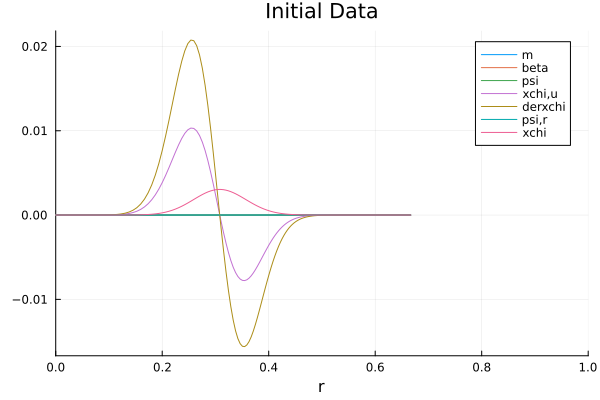

In [134]:
using Plots #showing initial data and the initial status of the horizon finder
plot(compactify.(initX[4:L-3]), state_array[4:L-3,1:7], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xchi,u" "derxchi" "psi,r" "xchi"],xlim=[0,1])

In [135]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

In [136]:
state_array[:,7]

207-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 3.745465214534568e-12
 2.127124985310012e-11
 9.151753621094872e-11
 3.3300877350447254e-10
 1.0772037240924279e-9
 3.1780551534449965e-9
 8.680440849859788e-9
 2.2166105546323087e-8
 5.3289699294253525e-8
 ⋮
 3.076698414530038e-14
 2.5981116543125118e-14
 2.195276064315173e-14
 1.8560032859388727e-14
 1.570096681415322e-14
 1.3290210700792088e-14
 1.1256279888277781e-14
 9.539270199112184e-15
 8.088953596958606e-15
 0.0
 0.0
 0.0

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [137]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "deruxchi", "derxchi", "derpsi", "xchi"]


print_muninn(files, 0, state_array[:,1:7],res,"w", state_array[:,8])

In [138]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [139]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

99.99999999999999


In [140]:
using Base.Threads
Threads.nthreads()

4

In [141]:
dt=0.0001/2^(m-1)

0.0001

 ## Time evolution

fixed grid

In [ ]:
finaltime=3
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.0001, t=0.009999999999999995 speed is 0.5000000000000001, dx/dt=100.0


iteration 200 dt is 0.0001, t=0.019999999999999934 speed is 0.5000000000000001, dx/dt=100.0


iteration 300 dt is 0.0001, t=0.029999999999999874 speed is 0.5000000000000001, dx/dt=100.0


iteration 400 dt is 0.0001, t=0.04000000000000012 speed is 0.5000000000000001, dx/dt=100.0


iteration 500 dt is 0.0001, t=0.050000000000000405 speed is 0.5000000000000001, dx/dt=100.0


iteration 600 dt is 0.0001, t=0.06000000000000069 speed is 0.5000000000000001, dx/dt=100.0


iteration 700 dt is 0.0001, t=0.07000000000000098 speed is 0.5000000000000001, dx/dt=100.0


iteration 800 dt is 0.0001, t=0.08000000000000126 speed is 0.5000000000000001, dx/dt=100.0


iteration 900 dt is 0.0001, t=0.09000000000000155 speed is 0.5000000000000001, dx/dt=100.0


iteration 1000 dt is 0.0001, t=0.10000000000000184 speed is 0.5000000000000001, dx/dt=100.0


iteration 1100 dt is 0.0001, t=0.11000000000000212 speed is 0.5



iteration 8900 dt is 0.0001, t=0.8899999999999183 speed is 0.5000000000000001, dx/dt=100.0


iteration 9000 dt is 0.0001, t=0.8999999999999172 speed is 0.5000000000000001, dx/dt=100.0


iteration 9100 dt is 0.0001, t=0.9099999999999161 speed is 0.5000000000000001, dx/dt=100.0


iteration 9200 dt is 0.0001, t=0.919999999999915 speed is 0.5000000000000001, dx/dt=100.0


iteration 9300 dt is 0.0001, t=0.9299999999999139 speed is 0.5000000000000001, dx/dt=100.0


iteration 9400 dt is 0.0001, t=0.9399999999999128 speed is 0.5000000000000001, dx/dt=100.0


iteration 9500 dt is 0.0001, t=0.9499999999999117 speed is 0.5000000000000001, dx/dt=100.0


iteration 9600 dt is 0.0001, t=0.9599999999999106 speed is 0.5000000000000001, dx/dt=100.0


iteration 9700 dt is 0.0001, t=0.9699999999999095 speed is 0.5000000000000001, dx/dt=100.0


iteration 9800 dt is 0.0001, t=0.9799999999999084 speed is 0.5000000000000001, dx/dt=100.0


iteration 9900 dt is 0.0001, t=0.9899999999999073 speed is 0.50000000